## The "liamometer" linear regression of IMDB ratings part I: EDA

--- 

### Notebook roadmap: 
    - Read in CSVs (this notebook)
    - EDA of each review data source, choosing a dataset
        - RottenTomatoes
        - Metacritic
        - IMDB

    
---

### Project summary: 

The liamometer is an interpretive model that asks the question: what if all viewers cared about were films from unknown international distributors? It serves as a hopeful vehicle for better representation in the movie industry. The project scraped data on thousands of movies from 2017-2020 and intends to capture the contemporary taste of viewers.

View the liamometer: http://liamisaacs.com/liamometer

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline
sns.set(style="white")  

In [18]:
#Mojo = BoxOfficeMojo 2017-2020 data, tutorial available here: https://yeqiuu.medium.com/tutorial-scraping-boxofficemojo-with-scrapy-299e7b35254e
mojo = pd.read_csv('data/mojo.csv')
#IMDB = IMDB data for all movies in Mojo
imdb = pd.read_csv('data/imdb.csv')
#Metacritic = metacritic data for mostly all movies in Mojo - this is because we "guess" the url structure as opposed to using the site's query option
metacritic = pd.read_csv('data/metacritic.csv')
#tomato = from rotten tomatoes, to get movie images and critic counts
tomato = pd.read_csv('data/rotten_tomatoes.csv')
#heirloom = IMAGES from rotten tomatoes only
heirloom = pd.read_csv('data/movie_images.csv')

#Setting indexes for proper merging later
mojo.rename(columns={"title": "mojo_title"}, inplace=True)
heirloom.set_index(['mojo_title'])
imdb.set_index(['mojo_title'])
metacritic.set_index(['mojo_title'])
tomato.set_index(['mojo_title'])
mojo.set_index(['mojo_title'])

mojo.head(1)

,mojo_title,domestic_revenue,international_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Made in France,"$9,956",NaN,"$9,956",Under The Milky Way,"$3,688",2 theaters,NaN,NaN,"Crime, Drama, Thriller","Sep 23, 2016"


---

### RottenTomatoes

---

In [19]:
tomato_final = tomato.merge(heirloom, on='mojo_title', how='left')
tomato_final = tomato_final.drop(['url_y', 'tomato_criticcount_x'], axis=1)
tomato_final = tomato_final.rename(columns={"tomato_criticcount_y":"tomato_criticcount", "url_x":"url"})
tomato_final = tomato_final.dropna(subset=['tomato_image'])
tomato_final.head(1)

,mojo_title,url,tomato_title,tomato_criticscore,tomato_audiencescore,tomato_criticcount,tomato_audiencecount,tomato_image
1,Annabelle: Creation,https://rottentomatoes.com/m/annabelle_creation,Annabelle: Creation,71.0,67.0,189,22020.0,"<img class=""posterImage js-lazyLoad"" data-src=..."


/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


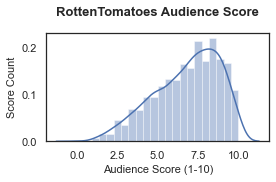

In [20]:
def get_img_url(df):  
    return re.findall('(?<=data-src).*$', df)[0][2:-2]
tomato_final['tomato_image'] = tomato_final['tomato_image'].apply(get_img_url)

#Plot EDA

plt.figure(figsize=(4, 2))
sns.set_style(style='white') 
ax = sns.distplot(tomato_final['tomato_audiencescore']/10)
ax.set_title("RottenTomatoes Audience Score", fontsize=13, weight='bold', y=1.1)

plt.xlabel('Audience Score (1-10)', fontsize=11)
plt.ylabel('Score Count', fontsize=11)
plt.plot()

plt.savefig('RT.png', dpi=300, bbox_inches='tight')

---

### IMDB

--- 

In [21]:
#"Link error" is part of our webscraper. That's designed for any url we could not guess properly. 
imdb = imdb.drop(imdb[imdb['imdbscore']=='Link error'].index)

In [22]:
#Convert from str->number
imdb['imdbscore'] = pd.to_numeric(imdb['imdbscore'])

/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


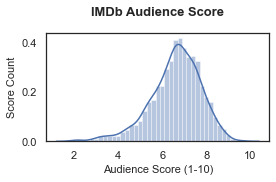

In [28]:
#Plot EDA

plt.figure(figsize=(4, 2))
sns.set_style(style='white') 
ax = sns.distplot(imdb['imdbscore'])
ax.set_title("IMDb Audience Score", fontsize=13, weight='bold', y=1.1)

plt.xlabel('Audience Score (1-10)', fontsize=11)
plt.ylabel('Score Count', fontsize=11)
plt.plot()

#plt.savefig('IMDB.png', dpi=300, bbox_inches='tight')

---

### Metacritic

--- 

In [24]:
#Check for null values
metacritic.isna().sum()

mojo_title            0
mc_criticscore        1
mc_criticcount        1
mc_audiencescore      1
mc_audiencecount    383
dtype: int64

In [25]:
#Drop anything our webscraper failed to read
drop = ['tbd', 'Link error']
metacritic.drop(metacritic.index[metacritic['mc_criticscore'].isin(drop)], inplace = True)

In [26]:
#Convert to number
metacritic['mc_criticscore'] = pd.to_numeric(metacritic['mc_criticscore'])

/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


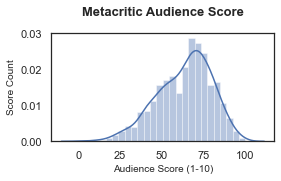

In [29]:
plt.figure(figsize=(4, 2))
sns.set_style(style='white') 
# plt.scatter(test_set_pred, y_test, alpha=.1,  scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax = sns.distplot(metacritic['mc_criticscore'])
ax.set_title("Metacritic Audience Score", fontsize=13, weight='bold', y=1.1)

plt.xlabel('Audience Score (1-10)', fontsize=10)
plt.ylabel('Score Count', fontsize=10)
plt.plot()

#plt.savefig('MC.png', dpi=300, bbox_inches='tight')

----

End of EDA

Conclusion: IMDB is the most normally distributed (least skewed) and tends to have a larger amount of ratings, so we will use that as a data source. We cannot combine them, because the data collection methods are not the same.